In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
cars=pd.read_csv('/content/drive/MyDrive/merc.csv')

In [ ]:
cars.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


#Discover the data

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


In [ ]:
cars.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [5]:
cars[cars['engineSize']==0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
9618,A Class,2016,17500,Automatic,29712,Diesel,20,68.9,0.0
9619,A Class,2018,20500,Automatic,13386,Petrol,145,53.3,0.0
9621,A Class,2018,18000,Automatic,18347,Diesel,150,65.7,0.0
9650,GLA Class,2016,18700,Other,30895,Other,125,56.5,0.0
9654,A Class,2016,17800,Automatic,21913,Diesel,20,68.9,0.0
10675,SL CLASS,2016,16500,Automatic,26955,Diesel,30,70.6,0.0
10710,A Class,2018,17500,Automatic,19796,Diesel,145,74.3,0.0
10739,GLA Class,2017,16000,Manual,34635,Diesel,30,64.2,0.0
10815,A Class,2017,18000,Automatic,33282,Diesel,145,68.9,0.0
11183,E Class,2018,22738,Automatic,24000,Diesel,150,61.4,0.0


there is no engine size equal 0 so zeros in **engineSize** columns should be deleted


In [6]:
cars['engineSize'].replace({0.0:np.nan},inplace=True)

In [ ]:
cars.isnull().sum()

In [81]:
cars.dropna(inplace=True)

mile per gallon (mpg) have some vlaues are equal to 1.1, which is not normal value and 1.1 values should be deleted 

In [85]:
cars[cars['mpg']<20]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
2524,A Class,2020,30231,Semi-Auto,4000,Hybrid,140,1.1,1.3
2560,A Class,2020,30231,Semi-Auto,4000,Hybrid,140,1.1,1.3
3978,G Class,2019,102502,Semi-Auto,8691,Diesel,150,11.0,3.0
6970,A Class,2020,31500,Semi-Auto,1000,Hybrid,135,1.1,1.3
10366,A Class,2020,33900,Automatic,345,Hybrid,140,1.1,1.3
11580,CL Class,2008,18975,Automatic,69000,Petrol,570,19.0,6.2
11581,CLK,2003,3495,Automatic,185000,Petrol,330,17.8,4.3
11923,E Class,2008,14995,Semi-Auto,55000,Petrol,570,19.8,6.2
12770,S Class,2010,26990,Automatic,38000,Petrol,570,19.5,6.2


In [86]:
cars['mpg'].replace({1.1:np.nan},inplace=True)

In [87]:
cars.dropna(inplace=True)

In [ ]:
cars.info()

In [92]:
cars.transmission.value_counts()

Semi-Auto    6845
Automatic    4824
Manual       1444
Other           2
Name: transmission, dtype: int64

In [91]:
cars.fuelType.value_counts()

Diesel    9187
Petrol    3752
Hybrid     169
Other        7
Name: fuelType, dtype: int64

In [93]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13115 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13115 non-null  object 
 1   year          13115 non-null  int64  
 2   price         13115 non-null  int64  
 3   transmission  13115 non-null  object 
 4   mileage       13115 non-null  int64  
 5   fuelType      13115 non-null  object 
 6   tax           13115 non-null  int64  
 7   mpg           13115 non-null  float64
 8   engineSize    13115 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.0+ MB


In [98]:
cars.corr()['price'].sort_values(ascending=False)

price         1.000000
year          0.520645
engineSize    0.516531
tax           0.268709
mpg          -0.438694
mileage      -0.537149
Name: price, dtype: float64

#visiualization

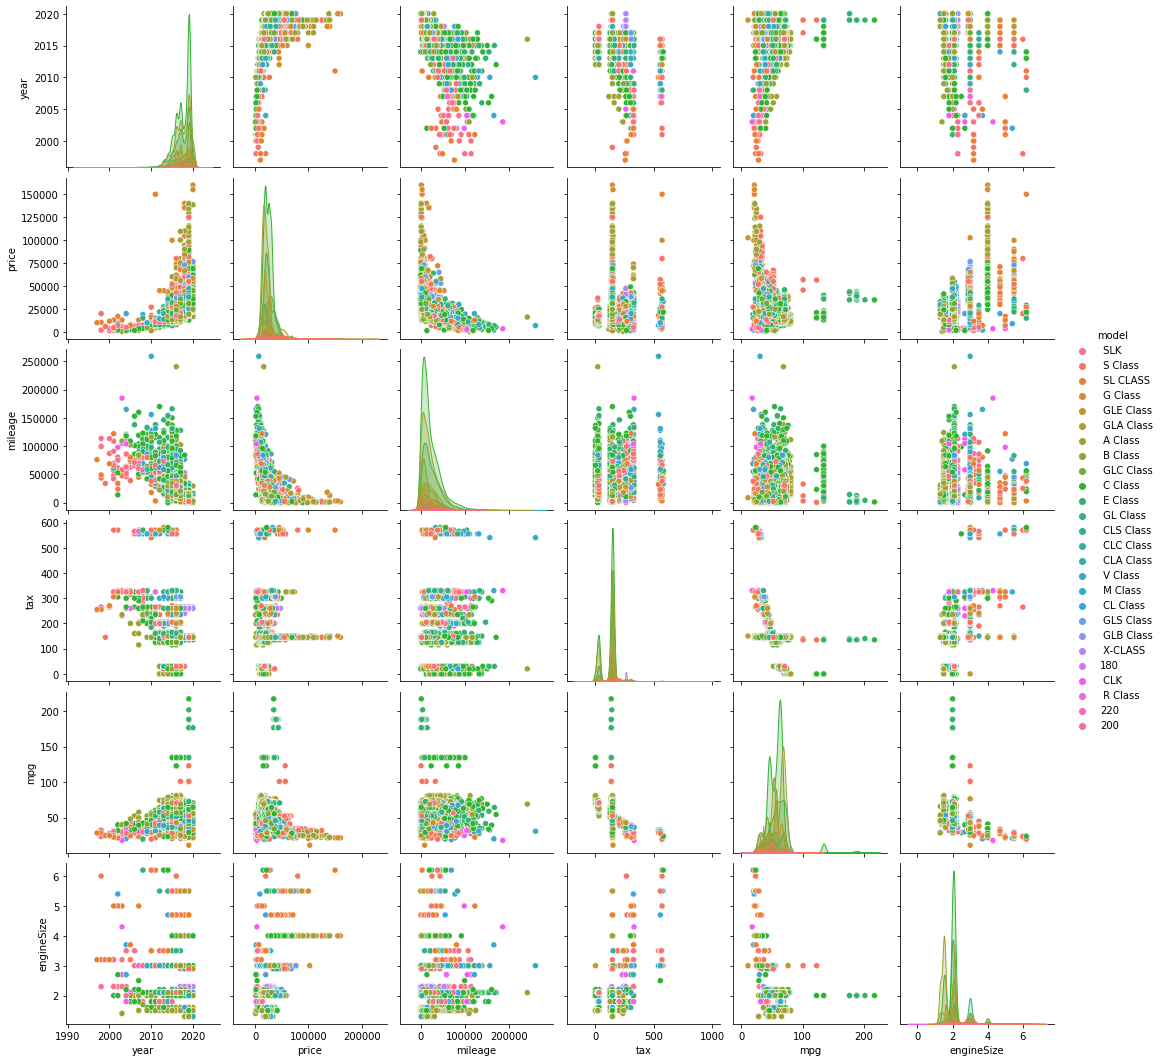

In [ ]:
sns.pairplot(cars,hue='model')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


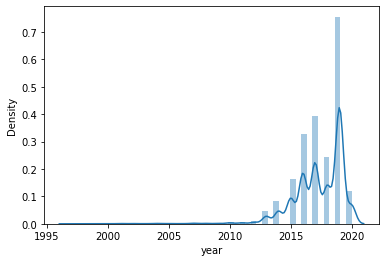

In [ ]:
sns.distplot(cars.year)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


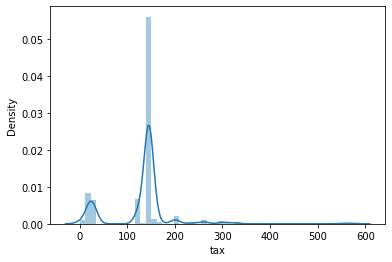

In [ ]:
sns.distplot(cars.tax)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


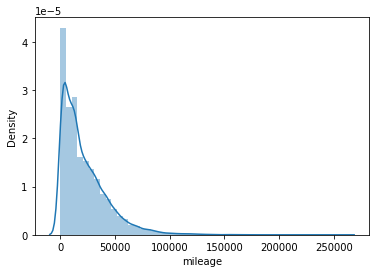

In [ ]:
sns.distplot(cars.mileage)

In [ ]:
sns.distributions()

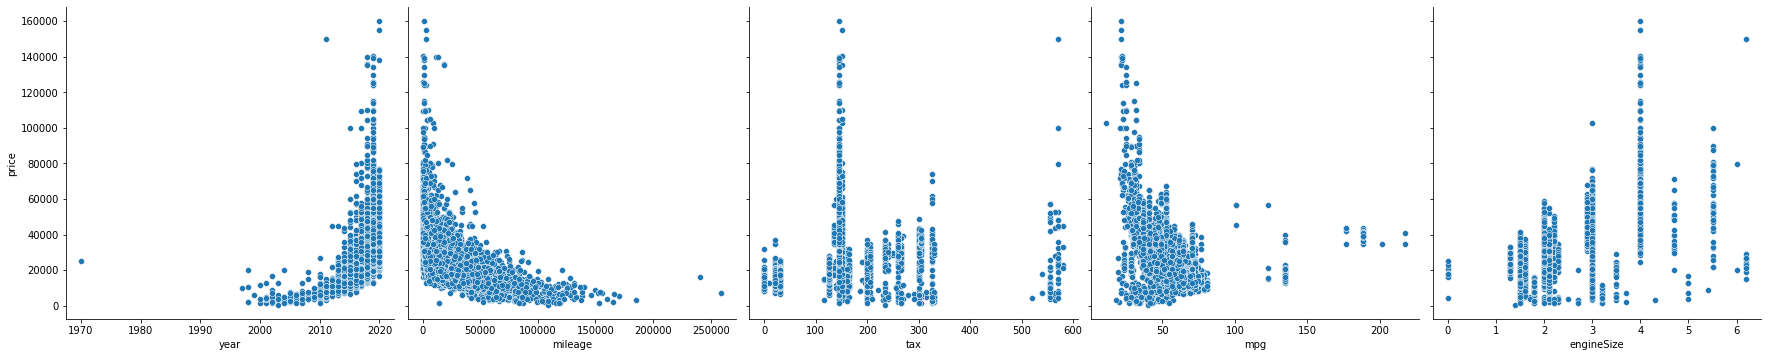

In [106]:
sns.pairplot(data=cars,
             x_vars=["year",'mileage',	'tax'	,'mpg'	,'engineSize'],
             y_vars=['price'],height=5,kind='scatter')

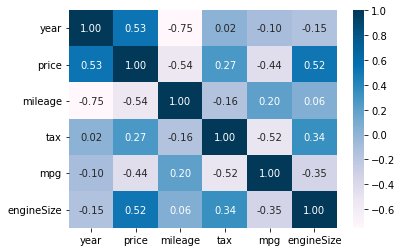

In [ ]:
sns.heatmap(cars.corr(),cmap="PuBu",annot=True,fmt='.2f')

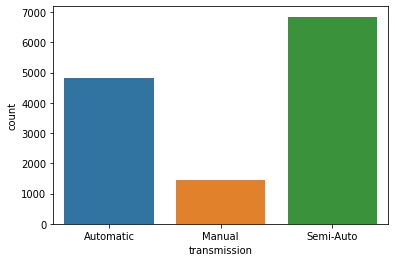

In [ ]:
sns.countplot(x=cars.transmission)

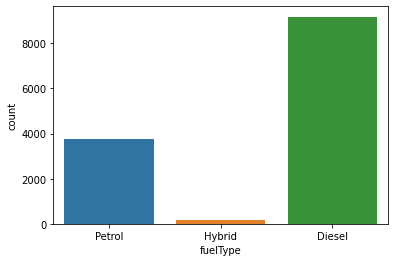

In [ ]:
sns.countplot(x=cars.fuelType)

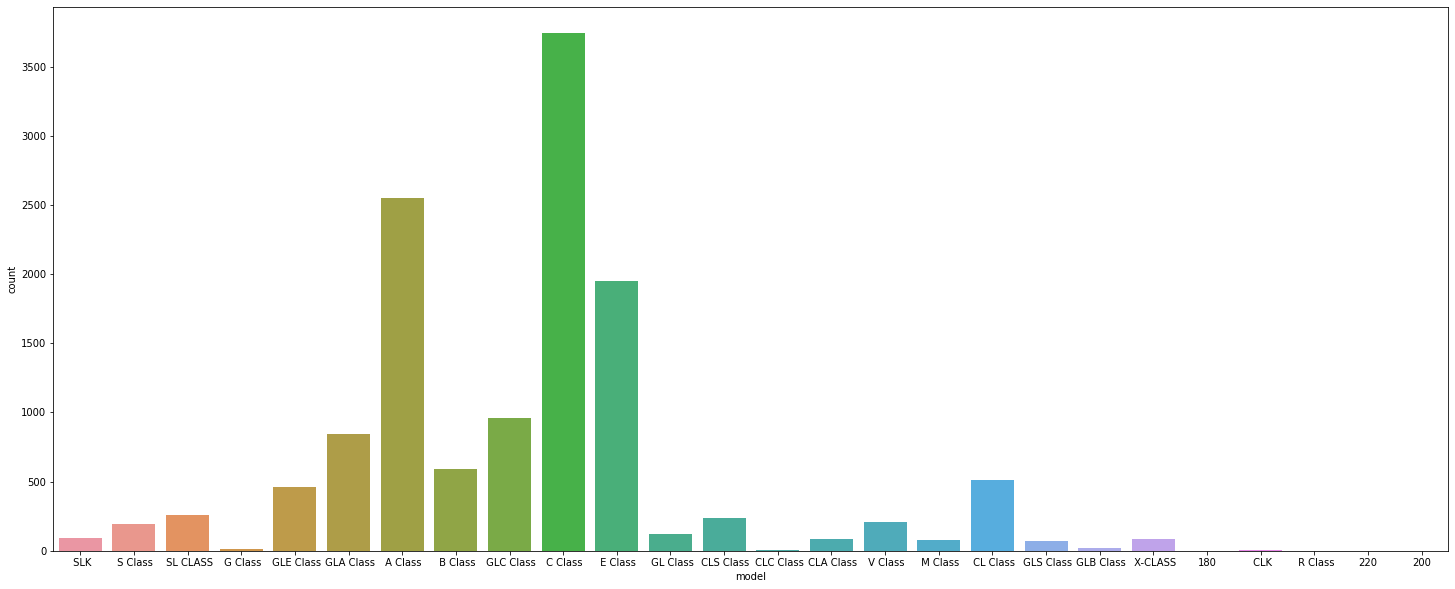

In [ ]:
plt.figure(figsize=[25,10])
sns.countplot(x=cars.model,)

#preprocessing

##onehotencoder

In [74]:
from sklearn.preprocessing import OneHotEncoder

In [75]:
cars_encoded=OneHotEncoder()
obj_encoded=cars_encoded.fit_transform(cars[['model',"fuelType",'transmission']]).toarray()

In [18]:
obj_encoded_columns_names=list(cars_encoded.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [19]:
obj_encoded_df=pd.DataFrame(obj_encoded,columns=obj_encoded_columns_names)

In [20]:
obj_encoded_df

,x0_ A Class,x0_ B Class,x0_ C Class,x0_ CL Class,x0_ CLA Class,x0_ CLC Class,x0_ CLK,x0_ CLS Class,x0_ E Class,x0_ G Class,x0_ GL Class,x0_ GLA Class,x0_ GLB Class,x0_ GLC Class,x0_ GLE Class,x0_ GLS Class,x0_ M Class,x0_ R Class,x0_ S Class,x0_ SL CLASS,x0_ SLK,x0_ V Class,x0_ X-CLASS,x0_180,x0_200,x0_220,x0_230,x1_Diesel,x1_Hybrid,x1_Other,x1_Petrol,x2_Automatic,x2_Manual,x2_Other,x2_Semi-Auto
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13114,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13115,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0



##standarization

In [65]:
num_cars=cars.select_dtypes(exclude='object')

In [ ]:
num_cars

,year,price,mileage,tax,mpg,engineSize
0,2005,5200,63000,325,32.1,1.8
1,2017,34948,27000,20,61.4,2.1
2,2016,49948,6200,555,28.0,5.5
3,2016,61948,16000,325,30.4,4.0
4,2016,73948,4000,325,30.1,4.0
...,...,...,...,...,...,...
13114,2020,35999,500,145,55.4,2.0
13115,2020,24699,2500,145,55.4,2.0
13116,2019,30999,11612,145,41.5,2.1
13117,2019,37990,2426,145,45.6,2.0


In [67]:
from sklearn.preprocessing import StandardScaler
stander=StandardScaler()


In [68]:
num_cars_stander=stander.fit_transform(num_cars)

In [69]:
num_cars_prepared=pd.DataFrame(num_cars_stander,columns=num_cars.columns)

##split the data

In [70]:
full_data_prepared=num_cars_prepared.join(obj_encoded_df)

In [71]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(full_data_prepared, test_size=0.2, random_state=42)

In [72]:
train_x=train_set.drop("price",axis=1)
train_y=train_set["price"]
test_x=test_set.drop("price",axis=1)
test_y=test_set["price"]

In [73]:
train_x

,year,mileage,tax,mpg,engineSize,x0_ A Class,x0_ B Class,x0_ C Class,x0_ CL Class,x0_ CLA Class,x0_ CLC Class,x0_ CLK,x0_ CLS Class,x0_ E Class,x0_ G Class,x0_ GL Class,x0_ GLA Class,x0_ GLB Class,x0_ GLC Class,x0_ GLE Class,x0_ GLS Class,x0_ M Class,x0_ R Class,x0_ S Class,x0_ SL CLASS,x0_ SLK,x0_ V Class,x0_ X-CLASS,x0_180,x0_200,x0_220,x0_230,x1_Diesel,x1_Hybrid,x1_Other,x1_Petrol,x2_Automatic,x2_Manual,x2_Other,x2_Semi-Auto
7765,0.765843,-0.989320,0.230284,-0.726426,-0.998472,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4007,-0.133186,0.269717,0.230284,-0.811843,1.622053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
274,0.316329,-0.000971,0.230284,0.594248,0.049738,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1281,-0.582700,0.533037,-0.076193,0.246011,0.049738,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6062,0.765843,-1.036119,0.230284,-0.811843,-0.124964,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,0.765843,-0.503528,0.230284,0.246011,-0.823771,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5191,-0.582700,0.719619,-1.685196,0.797934,0.049738,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5390,-0.133186,1.263686,-1.685196,1.257870,-0.998472,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
860,-1.032214,0.794941,-1.685196,0.594248,0.049738,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#Training

##ElasticNet

In [117]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet(alpha=0.5)

In [118]:
elastic.fit(train_x, train_y)

ElasticNet(alpha=0.5)

In [119]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(elastic,train_x, train_y,
                       scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print("Mean ", rmse_scores.mean())
print("std",rmse_scores.std())

Mean  0.7231199721990351
std 0.0611238209720289


In [120]:
elastic_predictions=elastic.predict(train_x)

In [121]:
print("predictiona",elastic_predictions[:5])
print("true values",list(train_y[:5]))

predictiona [ 0.08756986  0.32332738  0.02078096 -0.17044593  0.28153145]
true values [0.8343367708057636, 0.7129913226493925, -0.3389225588286277, -0.5065430978616108, 0.44724732449483445]


In [134]:
from sklearn.metrics import r2_score
print('accuracy =',r2_score(train_y,elastic_predictions))

accuracy = 0.4592349688012122


##support vector regression

In [126]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(train_x,train_y)

SVR()

In [127]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(svr,train_x, train_y,
                       scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print("Mean ", rmse_scores.mean())
print("std",rmse_scores.std())

Mean  0.2877413278815967
std 0.05495211899670221


In [128]:
svr_predictions=svr.predict(train_x)

In [129]:
print("prediction",svr_predictions[:5])
print("true values",list(train_y[:5]))

prediction [ 0.33152476  0.33888512 -0.27610942 -0.53540768  0.63201314]
true values [0.8343367708057636, 0.7129913226493925, -0.3389225588286277, -0.5065430978616108, 0.44724732449483445]


In [137]:
from sklearn.metrics import r2_score
print('accuracy on train=',r2_score(train_y,svr_predictions))

accuracy on train= 0.9251928570446503


In [136]:
svr_test_predictions=svr.predict(test_x)
r2_score(test_y,svr_test_predictions)
print('accuracy on test =',r2_score(test_y,svr_test_predictions))

accuracy on test = 0.9235654638003243


##GradientBoostingRegressor

In [139]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(train_x,train_y)

GradientBoostingRegressor()

In [140]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(gbr,train_x, train_y,
                       scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print("Mean ", rmse_scores.mean())
print("std",rmse_scores.std())

Mean  0.27624674428095924
std 0.0290091910013548


In [142]:
gbr_predictions=gbr.predict(train_x)
print("prediction",gbr_predictions[:5])
print("true values",list(train_y[:5]))

prediction [ 0.28622991  0.48760981 -0.27692268 -0.51452832  0.64514176]
true values [0.8343367708057636, 0.7129913226493925, -0.3389225588286277, -0.5065430978616108, 0.44724732449483445]


In [145]:
from sklearn.metrics import r2_score
print('accuracy on train=',r2_score(gbr_predictions,train_y))

accuracy on train= 0.9263313061422944


In [146]:
gbr_test_predictions=gbr.predict(test_x)

In [149]:
print('accuracy on test=',r2_score(test_y,gbr_test_predictions))

accuracy on test= 0.9248569535934502


##RandomForestRegressor
**best estimator**✅

In [150]:

from sklearn.ensemble import RandomForestRegressor
rand_forest=RandomForestRegressor()
rand_forest.fit(train_x,train_y)

RandomForestRegressor()

In [151]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(rand_forest,train_x, train_y,
                       scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
print("Mean ", rmse_scores.mean())
print("std",rmse_scores.std())

Mean  0.21994375867453703
std 0.02053285718623931


In [152]:
rand_predictions=rand_forest.predict(train_x)

In [153]:
print("prediction",rand_predictions[:5])
print("true values",list(train_y[:5]))

prediction [ 0.82339288  0.58911932 -0.35629767 -0.51673966  0.72490209]
true values [0.8343367708057636, 0.7129913226493925, -0.3389225588286277, -0.5065430978616108, 0.44724732449483445]


In [155]:
from sklearn.metrics import r2_score
print('accuracy on train=',r2_score(train_y,rand_predictions))

accuracy on train= 0.9927228287437552


In [159]:
test_prediction=rand_forest.predict(test_x)
r2_score(test_y,test_prediction)

0.9465682758239906

In [158]:
print("prediction",test_prediction[:5])
print("true values",list(train_y[:5]))

prediction [-0.12457938  0.68998994  2.34148101 -0.79577255  0.62280303]
true values [0.8343367708057636, 0.7129913226493925, -0.3389225588286277, -0.5065430978616108, 0.44724732449483445]
